<a href="https://colab.research.google.com/github/Cmeek09/Computer-Vision/blob/main/corn_length_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage.color import rgb2gray
# from skimage import data
# from skimage.filters import gaussian
# from skimage.segmentation import active_contour


# # Data for circular boundary
# s = np.linspace(0, 2*np.pi, 800)
# x = 50 + 100*np.cos(s)
# y = 150 + 100*np.sin(s)
# init = np.array([x, y]).T

# # formation of the active contour
# cntr = active_contour(gaussian(img, 3),init, alpha=0.015, beta=10, gamma=0.001)
# fig, ax = plt.subplots(1, 2, figsize=(7, 7))
# ax[0].imshow(img, cmap=plt.cm.gray)
# ax[0].set_title("corn detected")

# ax[1].imshow(img, cmap=plt.cm.gray)
# # circular boundary
# ax[1].plot(init[:, 0], init[:, 1], '--r', lw=3)
# ax[1].plot(cntr[:, 0], cntr[:, 1], '-b', lw=3)
# ax[1].set_title("Active Contour Image")

In [ ]:
# # binarize the image
# ret, bw = cv2.threshold(gray, 128, 255,
# cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# # find connected components
# connectivity = 5
# nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(bw, connectivity, cv2.CV_32S)
# sizes = stats[1:, -2]; nb_components = nb_components - 1
# min_size = 50 #threshhold value for objects in scene
# img2 = np.zeros((img.shape), np.uint8)
# for i in range(0, nb_components+1):
#     # use if sizes[i] >= min_size: to identify your objects
#     color = np.random.randint(255,size=3)
#     # draw the bounding rectangele around each object
#     cv2.rectangle(img2, (stats[i][0],stats[i][1]),(stats[i][0]+stats[i][2],stats[i][1]+stats[i][3]), (0,255,0), 2)
#     img2[output == i + 1] = color

# plt.figure()
# plt.title('lines')
# plt.imshow(cv.cvtColor(img2,cv.COLOR_BGR2RGB))





## Line **through** image

In [ ]:
# Import dependencies
import cv2
import matplotlib.pyplot as plt

img = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('corn')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))



# Print error message if image is null
if img is None:
    print('Could not read image')
# Draw line on image
imageLine = img.copy()
# Draw the image from point A to B
pointA = (0,210)
pointB = (500,210)
cv2.line(imageLine, pointA, pointB, (0, 0, 0), thickness=3, lineType=cv2.LINE_AA)

plt.figure()
plt.title('soil line')
plt.imshow(cv.cvtColor(imageLine,cv.COLOR_BGR2RGB))


## labeling contours / objects

In [ ]:
# import cv2 as cv
# import numpy as np
# import matplotlib.pyplot as plt
# import random as rng


# rng.seed(12345)

# ret,thresh = cv.threshold(closing,127,255,0)
# plt.figure()
# plt.imshow(thresh,cmap='gray', vmin=0, vmax=255)


# contours,hierarchy = cv.findContours(thresh, -1, 1)
# contours_poly = [None]*len(contours)
# boundRect = [None]*len(contours)
# centers = [None]*len(contours)
# radius = [None]*len(contours)
# for i, c in enumerate(contours):
#     contours_poly[i] = cv.approxPolyDP(c, 3, True)
#     boundRect[i] = cv.boundingRect(contours_poly[i])
#     centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])


# drawing = img

# # Draw polygonal contour + bonding rects + circles
# for i in range(len(contours)):
#     color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
#     cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
#       (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
#     cv2.putText(drawing, 'corn', (int(boundRect[i][0]), int(boundRect[i][1])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

# plt.figure()
# plt.title('finding corn')
# plt.imshow(cv.cvtColor(drawing,cv.COLOR_BGR2RGB) )


### skin mask version of eriks threshold attempt

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

#function from demo code for color components thresholding
def endosperm_rgb_threshold( src ):
    # extract color channels and save as SIGNED ints
    # need the extra width to do subraction
    b = src[:,:,0].astype(np.int16)
    g = src[:,:,1].astype(np.int16)
    r = src[:,:,2].astype(np.int16)

    #endosperm classifier from paper
    endosperm_mask =                                    \
          (r > 185) & (g > 125) & (b > 0)           \
        & ((src.max() - src.min()) > 15)           \
        & (np.abs(r-g) > 15) & (r > g) & (r > b)

    return src * endosperm_mask.reshape(endosperm_mask.shape[0], endosperm_mask.shape[1], 1)

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )


# using thresholds from Erik
skin = endosperm_rgb_threshold(src)
plt.figure()
plt.title('endosperm detected')
plt.imshow(cv.cvtColor(skin,cv.COLOR_BGR2RGB))

there are 15 coleoptiles, one for each seed


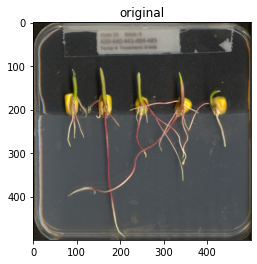

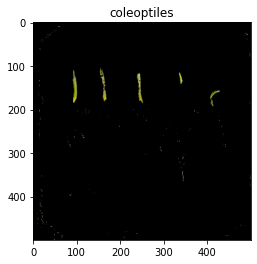

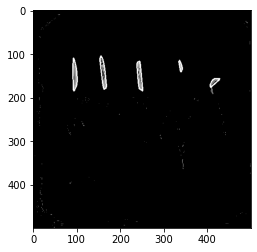

In [ ]:
## ORIGINAL WORKING COLEOPTILES

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )

# RGB threshold for for colors on coleoptiles
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lower = np.array([28, 36, 97])
upper = np.array([42, 255, 228])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(src, src, mask=mask)
plt.figure()
plt.title('coleoptiles')
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

# convert to grayscale
gray = cv.cvtColor(result, cv.COLOR_BGR2GRAY)

# Set the minimum area for a contour
min_area = 50

contours,hierarchy = cv.findContours(gray, -1, 1)
#hull = cv.convexHull(cnt)
image = gray
for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
      convexHull = cv.convexHull(contour)
      cv.drawContours(image, [convexHull], -1, (255, 0, 0), 2)
# Display the final convex hull image
#cv.imshow('ConvexHull', image)
plt.figure()
plt.imshow(image,cmap='gray', vmin=0, vmax=255)

print("there are " + str(len(convexHull)) + " coleoptiles, one for each seed")

there are 503 roots detected


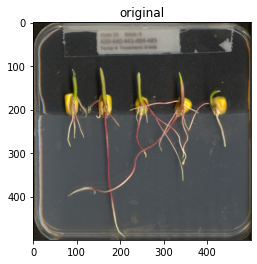

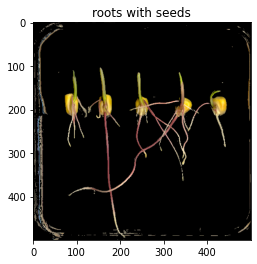

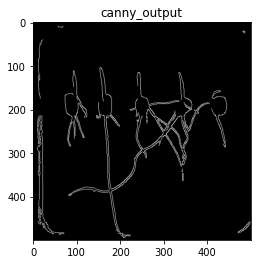

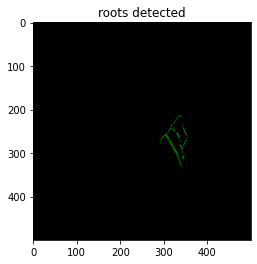

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math
import random as rng

rng.seed(13245)

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )

#colors of roots
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lower = np.array([0, 41, 101])
upper = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(src, src, mask=mask)

plt.figure()
plt.title('roots with seeds')
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

threshold = 500

# Detect edges using Canny
canny_output = cv.Canny(result, threshold, threshold * 2)
plt.figure()
plt.title('canny_output')
plt.imshow(cv.cvtColor(canny_output,cv.COLOR_BGR2RGB))

length, width = canny_output.shape

radius = .83*min(length,width)
radius2 = .25*min(length,width)
for i in range(length):     # this is the row
    for j in range(width):  # this is the column
      if radius > ((i+length) + (i-width)) or radius2 > ((j+length) + (j-width)):
        canny_output[i,j] = 0

# Find contours
contours, hierarchy = cv.findContours(canny_output, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = max(contours, key = len)

# Find the convex hull object for each contour
hull_list = []
for i in range(len(contours)):
    hull = cv.convexHull(contours[i])
    hull_list.append(hull)
# Draw contours + hull results
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = [0,255,0]
    cv.drawContours(drawing, contours, i, color)
    cv.drawContours(drawing, hull_list, i, color)

plt.figure()
plt.title('roots detected')
plt.imshow(cv.cvtColor(drawing,cv.COLOR_BGR2RGB))


print("there are " + str(len(contours)) + " roots detected")

roots in the image :  7


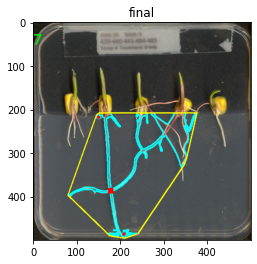

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math
import random as rng

rng.seed(13245)

#//load up the images
img = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB) )

#colors of roots
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower = np.array([0, 41, 101])
upper = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(img, img, mask=mask)

radius = .83*min(length,width)
radius2 = .25*min(length,width)
for i in range(length):     # this is the row
    for j in range(width):  # this is the column
      if radius > ((i+length) + (i-width)) or radius2 > ((j+length) + (j-width)):
        result[i,j] = 0


def mask(img):
    hsvim = cv.cvtColor(result, cv.COLOR_BGR2HSV)
    lower = np.array([0, 41, 101], dtype = "uint8")
    upper = np.array([179, 255, 255], dtype = "uint8")
    skinRegionHSV = cv.inRange(hsvim, lower, upper)
    blurred = cv.blur(skinRegionHSV, (2,2))
    ret, thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)
    return thresh

def getcnthull(mask_img):
    contours, hierarchy = cv.findContours(mask_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    contours = max(contours, key=lambda x: cv.contourArea(x))
    hull = cv.convexHull(contours)
    return contours, hull

def getdefects(contours):
    hull = cv.convexHull(contours, returnPoints=False)
    defects = cv.convexityDefects(contours, hull)
    return defects


img = cv.imread("/content/Maize Seedling.jpeg")



mask_img = mask(img)
contours, hull = getcnthull(mask_img)
cv.drawContours(img, [contours], -1, (255,255,0), 2)
cv.drawContours(img, [hull], -1, (0, 255, 255), 2)
defects = getdefects(contours)
if defects is not None:
    cnt = 0
    for i in range(defects.shape[0]):  # calculate the angle
        s, e, f, d = defects[i][0]
        start = tuple(contours[s][0])
        end = tuple(contours[e][0])
        far = tuple(contours[f][0])
        a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
        b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
        c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
        angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))  #      cosine theorem
        if angle <= np.pi / 2:  # angle less than 90 degree, treat as fingers
            cnt += 1
            cv.circle(img, far, 4, [0, 0, 255], -1)
    if cnt > 0:
        cnt = cnt+1
    cv.putText(img, str(cnt), (0, 50), cv.FONT_HERSHEY_SIMPLEX,1, (0, 255, 0) , 2, cv.LINE_AA)
plt.title('final')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB) )

print("roots in the image : ", str(cnt))

In [ ]:
#boudning box 3 boxes

import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math

def getdefects(contours):
    hull = cv.convexHull(contours, returnPoints=False)
    defects = cv.convexityDefects(contours, hull)
    return defects

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB) )

#colors of roots
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lower = np.array([0, 41, 101])
upper = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(src, src, mask=mask)

plt.figure()
plt.title('roots with seeds')
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

#convert to grayscale
grayResult = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(grayResult, 3)

length, width = blur.shape

radius = .83*min(length,width)
radius2 = .25*min(length,width)
for i in range(length):     # this is the row
    for j in range(width):  # this is the column
      if radius > ((i+length) + (i-width)) or radius2 > ((j+length) + (j-width)):
        blur[i,j] = 0

min_area = 150

# get contours
boundBoxImg = src.copy()
contours = cv2.findContours(blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    area = cv2.contourArea(cntr)
    if area > min_area:
      x,y,w,h = cv2.boundingRect(cntr)
      cv2.rectangle(boundBoxImg, (x, y), (x+w, y+h), (0, 255, 0), 2)
      # hull = cv.convexHull(contours, returnPoints=False)
      # defects = cv.convexityDefects(contours, hull)
      # print("x,y,w,h:",x,y,w,h)

plt.figure()
plt.title('result')
plt.imshow(cv.cvtColor(boundBoxImg,cv.COLOR_BGR2RGB))

NameError: ignored

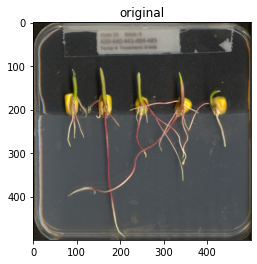

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB))


height, width= src.shape[:2]
image_gray= cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blank= np.zeros_like(image_gray)

# gives bounding box coords of interest
ROI_seed1= np.array([[(65,290),(65,210),(140,210),(140,290)]], dtype= np.int32)
ROI_seed2= np.array([[(150,height),(150,210),(220,210),(220,height)]], dtype= np.int32)
ROI_seed3= np.array([[(280,320),(280,210),(230,210),(230,320)]], dtype= np.int32)
ROI_seed4= np.array([[(360,320),(360,210),(300,210),(300,320)]], dtype= np.int32)
ROI_seed5= np.array([[(460,320),(460,210),(380,210),(380,320)]], dtype= np.int32)



# fills in bounding box with white, blacks out everything else
seed1_ROI= cv2.fillPoly(blank, ROI_seed1,255)
seed2_ROI= cv2.fillPoly(blank, ROI_seed2,255)
seed3_ROI= cv2.fillPoly(blank, ROI_seed3,255)
seed4_ROI= cv2.fillPoly(blank, ROI_seed4,255)
seed5_ROI= cv2.fillPoly(blank, ROI_seed5,255)

# fills ROI with image, masked area of interest
region_of_interest_image= cv2.bitwise_and(image_gray, seed1_ROI)
region_of_interest_image= cv2.bitwise_and(image_gray, seed2_ROI)
region_of_interest_image= cv2.bitwise_and(image_gray, seed3_ROI)
region_of_interest_image= cv2.bitwise_and(image_gray, seed4_ROI)
region_of_interest_image= cv2.bitwise_and(image_gray, seed5_ROI)

# blurred
blurredIm = cv.medianBlur(region_of_interest_image, 5)

edges = cv.Canny(blurredIm,50,100)

# blurred
dilated = cv2.dilate(edges, (3, 3), iterations=1)


# Find the contours
cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 350
rootCount = []
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        rootCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)

(cnt, hierarchy) = cv2.findContours(
    region_of_interest_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)


plt.figure()
plt.title('final')
plt.imshow(rgb)

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB))

height, width= src.shape[:2]
image_gray= cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blank= np.zeros_like(image_gray)

########################################################################################
# SEED 1
########################################################################################
seed1BB= np.array([[(65,290),(65,210),(140,210),(140,290)]], dtype= np.int32)
seed1_ROI= cv2.fillPoly(blank, seed1BB,255)
seed1RootMask= cv2.bitwise_and(image_gray, seed1_ROI)

# blurred
blurredIm = cv.medianBlur(seed1RootMask, 5)
edges = cv.Canny(blurredIm,50,100)
dilated = cv2.dilate(edges, (3, 3), iterations=1)

# Find the contours
cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 300
seed1RootCount = []
seed1centers=[]
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        xmin, xmax = min(c[0]), max(c[0])
        ymin, ymax = min(c[1]), max(c[1])
        # top_point1 = tuple(c[c[:,:,1].argmin()][0])
        # bottom_point1 = tuple(c[c[:,:,1].argmax()][0])
        distseed1 = math.sqrt((xmax-xmin)**2 + (ymax-ymin**2))
        seed1RootCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)
        M1 = cv2.moments(c)
        cX1 = int(M1['m10'] /M1['m00'])
        cY1 = int(M1['m01'] /M1['m00'])
        seed1centers.append([cX1,cY1])

if len(seed1centers) >=1:
        dx1= seed1centers[0][0] - seed1centers[1][0]
        dy1 = seed1centers[0][1] - seed1centers[1][1]
        D1 = np.sqrt(dx1*dx1+dy1*dy1)
        print(D1)

# print('contour distance for seed 1',distseed1)

(cnt, hierarchy) = cv2.findContours(
    seed1RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

########################################################################################
# SEED 2
########################################################################################

seed2BB= np.array([[(150,height),(150,210),(220,210),(220,height)]], dtype= np.int32)
seed2_ROI= cv2.fillPoly(blank, seed2BB,255)
seed2RootMask= cv2.bitwise_and(image_gray, seed2_ROI)

# blurred
blurredIm = cv.medianBlur(seed2RootMask, 5)
edges = cv.Canny(blurredIm,50,100)
dilated = cv2.dilate(edges, (3, 3), iterations=1)

# Find the contours
cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 700
seed2RootCount = []
seed2centers=[]
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        top_point2 = tuple(c[c[:,:,1].argmin()][0])
        bottom_point2 = tuple(c[c[:,:,1].argmax()][0])
        distseed2 = ((top_point2[1]-top_point2[0])**2 + (bottom_point2[1]-bottom_point2[0])**2)
        seed2RootCount.append(c)
        cv2.drawContours(src,[c], 0, (36,255,12), 2)
        M2 = cv2.moments(c)
        cX2 = int(M2['m10'] /M2['m00'])
        cY2 = int(M2['m01'] /M2['m00'])
        seed2centers.append([cX2,cY2])

if len(seed2centers) >=1:
        dx2= seed2centers[0][0] - seed2centers[1][0]
        dy2 = seed2centers[0][1] - seed2centers[1][1]
        D2 = np.sqrt(dx2*dx2+dy2*dy2)
        print(D2)

print('contour distance for seed 2',distseed2)


(cnt, hierarchy) = cv2.findContours(
    seed2RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

# ########################################################################################
# # SEED 3
# ########################################################################################
# seed3BB= np.array([[(280,320),(280,210),(230,210),(230,320)]], dtype= np.int32)
# seed3_ROI= cv2.fillPoly(blank, seed3BB,255)
# seed3RootMask= cv2.bitwise_and(image_gray, seed3_ROI)
# # blurred
# blurredIm = cv.medianBlur(seed3RootMask, 7)

# edges = cv.Canny(blurredIm,50,100)

# # blurred
# dilated = cv2.dilate(edges, (3, 3), iterations=1)


# # Find the contours
# cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# # Set the minimum area for a contour
# min_area = 750
# seed3RootCount = []
# seed3centers=[]
# # Draw the contours on the original image and the blank image
# for c in cnts:
#     area = cv2.contourArea(c)
#     if area > min_area:
#         seed3RootCount.append(c)
#         cv2.drawContours(src,[c], 0, (36,255,12), 2)
#         M3 = cv2.moments(c)
#         cX3 = int(M3['m10'] /M3['m00'])
#         cY3 = int(M3['m01'] /M3['m00'])
#         seed3centers.append([cX3,cY3])

# if len(seed3centers) >=1:
#         dx3= seed3centers[0][0] - seed3centers[1][0]
#         dy3 = seed3centers[0][1] - seed3centers[1][1]
#         D3 = np.sqrt(dx3*dx3+dy3*dy3)
#         print(D3)

# (cnt, hierarchy) = cv2.findContours(
#     seed3RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
# cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

# # ########################################################################################
# # SEED 4
# ##########################################################################################
# seed4BB= np.array([[(360,320),(360,210),(300,210),(300,320)]], dtype= np.int32)
# seed4_ROI= cv2.fillPoly(blank, seed4BB,255)
# seed4RootMask= cv2.bitwise_and(image_gray, seed4_ROI)
# # blurred
# blurredIm = cv.medianBlur(seed4RootMask, 5)
# edges = cv.Canny(blurredIm,50,100)
# dilated = cv2.dilate(edges, (3, 3), iterations=1)
# # Find the contours
# cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# # Set the minimum area for a contour
# min_area = 2000
# seed4RootCount = []
# seed4centers=[]
# # Draw the contours on the original image and the blank image
# for c in cnts:
#     area = cv2.contourArea(c)
#     if area > min_area:
#         seed4RootCount.append(c)
#         cv2.drawContours(src,[c], 0, (36,255,12), 2)
#         M4 = cv2.moments(c)
#         cX4 = int(M4['m10'] /M4['m00'])
#         cY4 = int(M4['m01'] /M4['m00'])
#         seed4centers.append([cX4,cY4])

# if len(seed4centers) >=1:
#         dx4= seed4centers[0][0] - seed4centers[1][0]
#         dy4 = seed4centers[0][1] - seed4centers[1][1]
#         D4 = np.sqrt(dx4*dx4+dy4*dy4)
#         print(D4)

# (cnt, hierarchy) = cv2.findContours(
#     seed4RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
# cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
# # ########################################################################################
# # SEED 5
# ##########################################################################################
# seed5BB= np.array([[(460,320),(460,210),(380,210),(380,320)]], dtype= np.int32)
# seed5_ROI= cv2.fillPoly(blank, seed5BB,255)
# seed5RootMask= cv2.bitwise_and(image_gray, seed5_ROI)
# # # blurred
# # blurredIm = cv.medianBlur(seed5RootMask, 5)

# edges = cv.Canny(seed5RootMask,50,100)

# # blurred
# dilated = cv2.dilate(edges, (3, 3), iterations=0)


# # Find the contours
# cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# # Set the minimum area for a contour
# min_area = 8905
# seed5RootCount = []
# seed5centers=[]
# # Draw the contours on the original image and the blank image
# for c in cnts:
#     area = cv2.contourArea(c)
#     if area > min_area:
#         seed5RootCount.append(c)
#         cv2.drawContours(src,[c], 0, (36,255,12), 2)
#         M5 = cv2.moments(c)
#         cX5 = int(M5['m10'] /M5['m00'])
#         cY5 = int(M5['m01'] /M5['m00'])
#         seed5centers.append([cX5,cY5])

# if len(seed5centers) >=2:
#         dx5= seed5centers[0][0] - seed5centers[1][0]
#         dy5 = seed5centers[0][1] - seed5centers[1][1]
#         D5 = np.sqrt(dx5*dx5+dy5*dy5)
#         print(D5)

# (cnt, hierarchy) = cv2.findContours(
#     seed5RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
# cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

# print('seed 1 has ',len(seed1RootCount), 'roots')
# print('seed 2 has ',len(seed2RootCount), 'roots')
# print('seed 3 has ',len(seed3RootCount), 'roots')
# print('seed 4 has ',len(seed4RootCount), 'roots')
# print('seed 5 has ',len(seed5RootCount), 'roots')

# print('\n')

# # ########################################################################################
# # DRAWING CONTOURS FOR ENTIRE IMAGE
# ##########################################################################################

# # gives bounding box coords of interest
# ROI_seed1= np.array([[(65,290),(65,210),(140,210),(140,290)]], dtype= np.int32)
# ROI_seed2= np.array([[(150,height),(150,210),(220,210),(220,height)]], dtype= np.int32)
# ROI_seed3= np.array([[(280,320),(280,210),(230,210),(230,320)]], dtype= np.int32)
# ROI_seed4= np.array([[(360,320),(360,210),(300,210),(300,320)]], dtype= np.int32)
# ROI_seed5= np.array([[(460,320),(460,210),(380,210),(380,320)]], dtype= np.int32)



# # fills in bounding box with white, blacks out everything else
# seed1_ROI= cv2.fillPoly(blank, ROI_seed1,255)
# seed2_ROI= cv2.fillPoly(blank, ROI_seed2,255)
# seed3_ROI= cv2.fillPoly(blank, ROI_seed3,255)
# seed4_ROI= cv2.fillPoly(blank, ROI_seed4,255)
# seed5_ROI= cv2.fillPoly(blank, ROI_seed5,255)

# # fills ROI with image, masked area of interest
# region_of_interest_image= cv2.bitwise_and(image_gray, seed1_ROI)
# region_of_interest_image= cv2.bitwise_and(image_gray, seed2_ROI)
# region_of_interest_image= cv2.bitwise_and(image_gray, seed3_ROI)
# region_of_interest_image= cv2.bitwise_and(image_gray, seed4_ROI)
# region_of_interest_image= cv2.bitwise_and(image_gray, seed5_ROI)

# # blurred
# blurredIm = cv.medianBlur(region_of_interest_image, 5)
# edges = cv.Canny(blurredIm,50,100)
# dilated = cv2.dilate(edges, (3, 3), iterations=1)
# # Find the contours
# cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# # Set the minimum area for a contour
# min_area = 300
# rootCount = []
# # Draw the contours on the original image and the blank image
# for c in cnts:
#     area = cv2.contourArea(c)
#     if area > min_area:
#         rootCount.append(c)
#         cv2.drawContours(src,[c], 0, (36,255,12), 2)

# (cnt, hierarchy) = cv2.findContours(
#     region_of_interest_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
# cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.figure()
plt.title('final')
plt.imshow(rgb)

# print('there are a total of ',len(seed1RootCount)+len(seed2RootCount)+len(seed3RootCount)
# +len(seed4RootCount)+len(seed5RootCount), 'roots')

# print('\n')

# if (len(rootCount)) >= 5:
#   print('germination rate is 100 %')
# else:
#   print('some seeds are missing roots')

# print(len(seed1RootCount[0]))

72.3394774656273


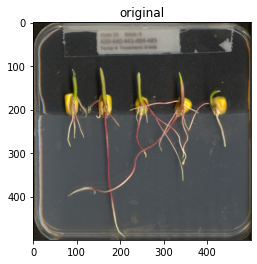

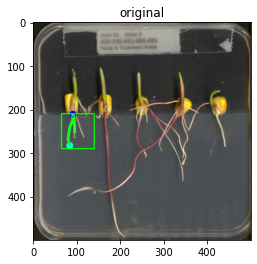

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math



# ########################################################################################
# # SEED 1
# ########################################################################################

#//load up the images
src = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB))

height, width= src.shape[:2]
image_gray= cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blank= np.zeros_like(image_gray)
seed1BB= np.array([[(65,290),(65,210),(140,210),(140,290)]], dtype= np.int32)
seed1_ROI= cv2.fillPoly(blank, seed1BB,255)
seed1RootMask= cv2.bitwise_and(image_gray, seed1_ROI)

# blurred
blurredIm = cv.medianBlur(seed1RootMask, 5)
edges = cv.Canny(blurredIm,50,100)
dilated = cv2.dilate(edges, (3, 3), iterations=1)

# Find the contours
cnts = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Set the minimum area for a contour
min_area = 300
max_area = 350
seed1RootCount = []
seed1centers=[]
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
      extTop = tuple(c[c[:, :, 1].argmin()][0])
      extBot = tuple(c[c[:, :, 1].argmax()][0])
      distseed1 = math.sqrt((extBot[0]-extTop[0])**2 + (extBot[1]-extTop[1])**2)
      cv2.drawContours(src, [c], -1, (0, 255, 255), 2)
      cv2.circle(src, extTop, 8, (255, 0, 0), -1)
      cv2.circle(src, extBot, 8, (255, 255, 0), -1)
      seed1RootCount.append(c)
      cv2.drawContours(src,[c], 0, (36,255,12), 2)

print(distseed1)
(cnt, hierarchy) = cv2.findContours(
    seed1RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.figure()
plt.title('original')
plt.imshow(rgb)



80.0


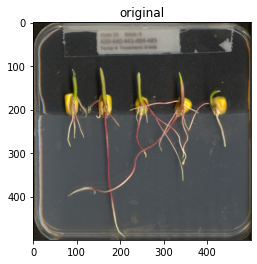

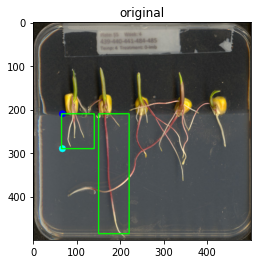

In [ ]:
########################################################################################
# SEED 2
########################################################################################

#//load up the images
src2 = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src2,cv.COLOR_BGR2RGB))

seed2BB= np.array([[(150,485),(150,210),(220,210),(220,485)]], dtype= np.int32)
seed2_ROI= cv2.fillPoly(blank, seed2BB,255)
seed2RootMask= cv2.bitwise_and(image_gray, seed2_ROI)

edges = cv.Canny(seed2RootMask,50,65)
ret,thresh = cv.threshold(blurredIm,255,0,255)

# # blurred
dilated = cv2.dilate(edges, (1, 1), iterations=0)

# Find the contours
cnts2 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts2[0] if len(cnts2) == 2 else cnts2[1]

# Set the minimum area for a contour
min_area2 = 0
max_area2 = 1000000
seed2RootCount = []
seed2centers=[]
# Draw the contours on the original image and the blank image
for c2 in cnts2:
    area = cv2.contourArea(c)
    if area > min_area2 and area < max_area2:
      extTop2 = tuple(c2[c2[:, :, 1].argmin()][0])
      extBot2 = tuple(c2[c2[:, :, 1].argmax()][0])
      distseed2 = math.sqrt((extBot2[0]-extTop2[0])**2 + (extBot2[1]-extTop2[1])**2)
    # extTop = tuple(c[c[:, :, 1].argmin()][0])
#     extBot = tuple(c[c[:, :, 1].argmax()][0])
#     distseed1 = math.sqrt((extBot[0]-extTop[0])**2 + (extBot[1]-extTop[1])**2)
      cv2.drawContours(src2, [c2], -1, (0, 255, 255), 2)
      cv2.circle(src2, extTop2, 8, (255, 0, 0), -1)
      cv2.circle(src2, extBot2, 8, (255, 255, 0), -1)
      seed2RootCount.append(c2)
      cv2.drawContours(src2,[c2], 0, (36,255,12), 2)
# print('contour distance for seed 2',distseed2)

print(distseed2)
(cnt, hierarchy) = cv2.findContours(
    seed2RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb2 = cv2.cvtColor(src2, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb2, cnt, -1, (0, 255, 0), 2)

plt.figure()
plt.title('original')
plt.imshow(rgb2)



93.53608929178085


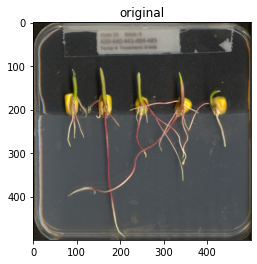

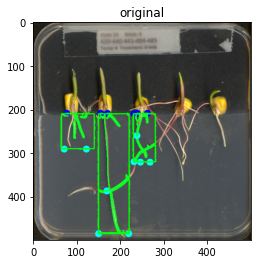

In [ ]:
########################################################################################
# SEED 3
########################################################################################

#//load up the images
src3 = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src3,cv.COLOR_BGR2RGB))


seed3BB= np.array([[(280,320),(280,210),(230,210),(230,320)]], dtype= np.int32)
seed3_ROI= cv2.fillPoly(blank, seed3BB,255)
seed3RootMask= cv2.bitwise_and(image_gray, seed3_ROI)

# # blurred
# blurredIm = cv.medianBlur(seed3RootMask, 7)

ret,thresh = cv.threshold(seed3RootMask,127,255,50)
edges = cv.Canny(thresh,50,100)

# dilated = cv2.dilate(edges, (3, 3), iterations=1)

# Find the contours
cnts3 = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts3 = cnts3[0] if len(cnts3) == 2 else cnts3[1]

# Set the minimum area for a contour
min_area3 = 150
seed3RootCount = []
seed3centers=[]
# Draw the contours on the original image and the blank image
for c3 in cnts3:
    area = cv2.contourArea(c3)
    if area > min_area3:
        extTop3 = tuple(c3[c3[:, :, 1].argmin()][0])
        extBot3 = tuple(c3[c3[:, :, 1].argmax()][0])
        distseed3 = math.sqrt((extBot3[0]-extTop3[0])**2 + (extBot3[1]-extTop3[1])**2)
        cv2.drawContours(src, [c], -1, (0, 255, 255), 2)
        cv2.circle(src3, extTop3, 8, (255, 0, 0), -1)
        cv2.circle(src3, extBot3, 8, (255, 255, 0), -1)
        seed3RootCount.append(c3)
        cv2.drawContours(src3,[c3], 0, (36,255,12), 2)

print(distseed3)

(cnt, hierarchy) = cv2.findContours(
    seed3RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src3, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.figure()
plt.title('original')
plt.imshow(rgb)



82.73451516749222


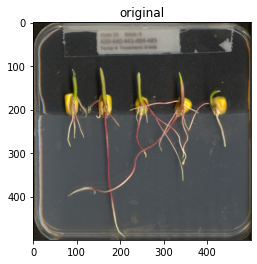

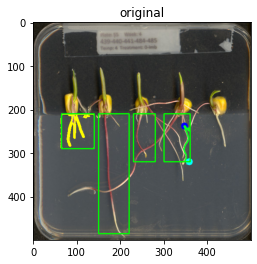

In [ ]:
# ########################################################################################
# SEED 4
##########################################################################################

#//load up the images
src4 = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src4,cv.COLOR_BGR2RGB))

seed4BB= np.array([[(360,320),(360,210),(300,210),(300,320)]], dtype= np.int32)
seed4_ROI= cv2.fillPoly(blank, seed4BB,255)
seed4RootMask= cv2.bitwise_and(image_gray, seed4_ROI)
# blurred
blurredIm = cv.medianBlur(seed4RootMask, 5)
edges = cv.Canny(blurredIm,50,100)
dilated = cv2.dilate(edges, (3, 3), iterations=1)
# Find the contours
cnts4 = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts4 = cnts4[0] if len(cnts4) == 2 else cnts4[1]

# Set the minimum area for a contour
min_area4 = 600
max_area4 = 900
seed4RootCount = []
seed4centers=[]
# Draw the contours on the original image and the blank image
for c4 in cnts4:
    area = cv2.contourArea(c4)
    if area > min_area4 and area < max_area4:
        extTop4 = tuple(c4[c4[:, :, 1].argmin()][0])
        extBot4 = tuple(c4[c4[:, :, 1].argmax()][0])
        distseed4 = math.sqrt((extBot4[0]-extTop4[0])**2 + (extBot4[1]-extTop4[1])**2)
        cv2.drawContours(src4, [c], -1, (0, 255, 255), 2)
        cv2.circle(src4, extTop4, 8, (255, 0, 0), -1)
        cv2.circle(src4, extBot4, 8, (255, 255, 0), -1)
        seed4RootCount.append(c4)
        cv2.drawContours(src4,[c4], 0, (36,255,12), 2)

print(distseed4)
(cnt, hierarchy) = cv2.findContours(
    seed4RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src4, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.figure()
plt.title('original')
plt.imshow(rgb)



3.605551275463989
seed 1 has  1 roots
seed 2 has  1 roots
seed 3 has  9 roots
seed 4 has  1 roots
seed 5 has  9 roots


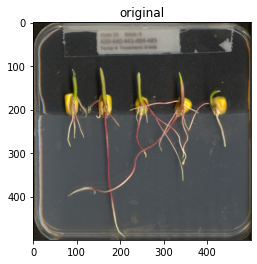

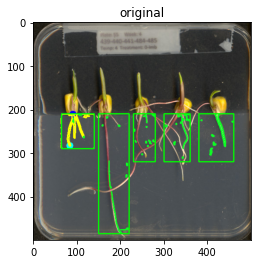

In [ ]:
# ########################################################################################
# SEED 5
##########################################################################################

#//load up the images
src5 = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(src5,cv.COLOR_BGR2RGB))

seed5BB= np.array([[(460,320),(460,210),(380,210),(380,320)]], dtype= np.int32)
seed5_ROI= cv2.fillPoly(blank, seed5BB,255)
seed5RootMask= cv2.bitwise_and(image_gray, seed5_ROI)
# # blurred
# blurredIm = cv.medianBlur(seed5RootMask, 5)

edges = cv.Canny(seed5RootMask,50,100)

# blurred
dilated = cv2.dilate(edges, (3, 3), iterations=0)


# Find the contours
cnts5 = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts5 = cnts5[0] if len(cnts5) == 2 else cnts5[1]

# Set the minimum area for a contour
min_area5 = 5
max_area5 = 10
seed5RootCount = []
seed5centers=[]
# Draw the contours on the original image and the blank image
for c5 in cnts5:
    area = cv2.contourArea(c5)
    if area > min_area5 and area < max_area5:
        extTop5 = tuple(c5[c5[:, :, 1].argmin()][0])
        extBot5 = tuple(c5[c5[:, :, 1].argmax()][0])
        distseed5 = math.sqrt((extBot5[0]-extTop5[0])**2 + (extBot5[1]-extTop5[1])**2)
        seed5RootCount.append(c5)
        cv2.drawContours(src,[c5], 0, (36,255,12), 2)


print(distseed5)

(cnt, hierarchy) = cv2.findContours(
    seed5RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.figure()
plt.title('original')
plt.imshow(rgb)

print('seed 1 has ',len(seed1RootCount), 'roots')
print('seed 2 has ',len(seed2RootCount), 'roots')
print('seed 3 has ',len(seed3RootCount), 'roots')
print('seed 4 has ',len(seed4RootCount), 'roots')
print('seed 5 has ',len(seed5RootCount), 'roots')

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math

# # ########################################################################################
# # # SEED 2
# # ########################################################################################

#//load up the images
img = cv.imread("/content/Maize Seedling.jpeg", cv.IMREAD_COLOR)
plt.figure()
plt.title('original')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

height, width= img.shape[:2]
image_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blank= np.zeros_like(image_gray)

seed2BB= np.array([[(150,485),(150,210),(220,210),(220,485)]], dtype= np.int32)
seed2_ROI= cv2.fillPoly(blank, seed2BB,255)
seed2RootMask= cv2.bitwise_and(image_gray, seed2_ROI)

edges = cv.Canny(seed2RootMask,50,65)
ret,thresh = cv.threshold(blurredIm,255,0,255)

# # blurred
dilated = cv2.dilate(edges, (1, 1), iterations=0)

# Find the contours
cnts2 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts2[0] if len(cnts2) == 2 else cnts2[1]

# Set the minimum area for a contour
min_area2 = 5300
max_area2 = 5500
seed2RootCount = []
seed2centers=[]
# Draw the contours on the original image and the blank image
for c2 in cnts2:
    area = cv2.contourArea(c)
    if area > min_area2 and area < max_area2:
      extTop2 = tuple(c2[c2[:, :, 1].argmin()][0])
      extBot2 = tuple(c2[c2[:, :, 1].argmax()][0])
      distseed2 = math.sqrt((extBot2[0]-extTop2[0])**2 + (extBot2[1]-extTop2[1])**2)
    # extTop = tuple(c[c[:, :, 1].argmin()][0])
#     extBot = tuple(c[c[:, :, 1].argmax()][0])
#     distseed1 = math.sqrt((extBot[0]-extTop[0])**2 + (extBot[1]-extTop[1])**2)
      cv2.drawContours(img, [c2], -1, (0, 255, 255), 2)
      cv2.circle(img, extTop2, 8, (255, 0, 0), -1)
      cv2.circle(img, extBot2, 8, (255, 255, 0), -1)
      seed2RootCount.append(c2)
      cv2.drawContours(img,[c2], 0, (36,255,12), 2)
# print('contour distance for seed 2',distseed2)

print(distseed2)
(cnt, hierarchy) = cv2.findContours(
    seed2RootMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.figure()
plt.title('original')
plt.imshow(rgb)
